In [1]:
import pandas as pd
import random

theFile = pd.read_csv("../data/full_df.csv")
theFile

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [2]:

target = theFile.loc[(theFile['Left-Diagnostic Keywords'] == 'cataract') | (theFile['Left-Diagnostic Keywords'] == 'normal fundus')]



In [3]:
print(len(target.loc[target['Left-Diagnostic Keywords'] == 'cataract']))
print(len(target.loc[target['Left-Diagnostic Keywords'] == 'normal fundus']))

268
2796


In [4]:
#As shown above, there are much more normal fundus entries than cataract
#Let's sample the normal fundus to get equivalent numbers of each class
cataract = target.loc[target['Left-Diagnostic Keywords'] == 'cataract']
normal = target.loc[target['Left-Diagnostic Keywords'] == 'normal fundus']
normal = normal.sample(268)
frames = [cataract, normal]
target = pd.concat(frames)

#now shuffle these randomly
# shuffle the DataFrame rows
target= target.sample(frac = 1)

In [5]:
pictures = target[['filename']]

In [6]:

target

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
1886,2740,55,Male,2740_left.jpg,2740_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2740_right.jpg
1601,2422,63,Female,2422_left.jpg,2422_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2422_right.jpg
2260,3143,66,Female,3143_left.jpg,3143_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3143_right.jpg
4671,2212,82,Male,2212_left.jpg,2212_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2212_left.jpg
5347,3028,51,Male,3028_left.jpg,3028_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3028_left.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,611,73,Male,611_left.jpg,611_right.jpg,cataract,epiretinal membrane,0,0,0,1,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",611_left.jpg
5239,2912,40,Male,2912_left.jpg,2912_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2912_left.jpg
1479,2212,82,Male,2212_left.jpg,2212_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2212_right.jpg
4990,2640,49,Male,2640_left.jpg,2640_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2640_left.jpg


In [7]:
classnames = ['[\'N\']', '[\'D\']','[\'G\']','[\'C\']','[\'A\']','[\'H\']','[\'M\']','[\'O\']']
classnames

["['N']", "['D']", "['G']", "['C']", "['A']", "['H']", "['M']", "['O']"]

In [8]:
pictures = pictures.values.tolist()
pictures = sum(pictures, [])
pictures

['2740_right.jpg',
 '2422_right.jpg',
 '3143_right.jpg',
 '2212_left.jpg',
 '3028_left.jpg',
 '2158_right.jpg',
 '2126_left.jpg',
 '691_left.jpg',
 '2168_left.jpg',
 '2341_right.jpg',
 '2157_right.jpg',
 '2207_left.jpg',
 '4038_right.jpg',
 '2151_left.jpg',
 '2371_left.jpg',
 '3245_left.jpg',
 '2914_right.jpg',
 '2133_left.jpg',
 '2796_right.jpg',
 '3107_right.jpg',
 '3287_right.jpg',
 '3234_left.jpg',
 '2172_left.jpg',
 '1109_right.jpg',
 '2728_right.jpg',
 '477_left.jpg',
 '2109_right.jpg',
 '3450_left.jpg',
 '4225_right.jpg',
 '2163_left.jpg',
 '3298_left.jpg',
 '343_left.jpg',
 '2128_left.jpg',
 '734_left.jpg',
 '2380_right.jpg',
 '641_right.jpg',
 '2211_left.jpg',
 '2221_left.jpg',
 '2849_right.jpg',
 '2637_right.jpg',
 '2337_right.jpg',
 '2117_right.jpg',
 '2101_left.jpg',
 '237_right.jpg',
 '3069_left.jpg',
 '828_right.jpg',
 '999_right.jpg',
 '2225_left.jpg',
 '2137_right.jpg',
 '2204_right.jpg',
 '4464_right.jpg',
 '2145_left.jpg',
 '0_left.jpg',
 '294_left.jpg',
 '2199_left.j

In [9]:
#sampling 30 photos 
small_pics= random.sample(pictures, 536)


In [10]:
#grab target if label matches 
classifications=list()
for pic_name in small_pics:
    intermediate = theFile.loc[theFile['filename'] == pic_name]
    label = intermediate['Left-Diagnostic Keywords'].to_string().replace('\'','').replace('    ', '').replace(',', '')
    label = ''.join([i for i in label if not i.isdigit()])
    classifications.append(label)
#classifications contains the "target" corresponding to small_pics

In [11]:
classifications

['normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'cataract',
 'normal fundus',
 'normal fundus',
 'cataract',
 'cataract',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'cataract',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'cataract',
 'normal fundus',
 'cataract',
 'normal fundus',
 'cataract',
 'cataract',
 'normal fundus',
 'cataract',
 'normal fundus',
 'cataract',
 'normal fundus',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal fundus',
 'normal fundus',
 'cataract',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'cataract',
 'normal fundus',
 'cataract',
 'normal fundus',
 'normal fundus',
 'cataract',
 'cataract',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'normal fundus',
 'cataract',
 'cataract',
 'normal fundus',
 'cataract',

In [12]:
import matplotlib.pyplot as plt
import cv2
actual_pics = []

img_res = 224

for file in small_pics:
    img = cv2.imread('../Challenge/images/' + file) #zero makes it greyscale
    #this is resizing all images
    img = cv2.resize(img, (img_res, img_res))
    actual_pics.append(img)

In [13]:
actual_pics[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

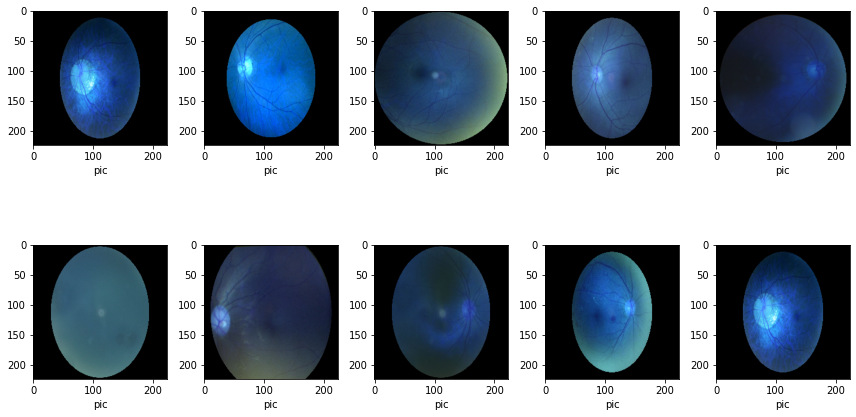

In [14]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(actual_pics)))
    image = actual_pics[sample]
    
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel('pic')
plt.tight_layout()    

In [15]:
print(small_pics[0])
print(classifications[0])

2380_right.jpg
normal fundus


In [16]:
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils

#normalize our data !!
labels = {
    "cataract": 0,
    "normal fundus": 1
}

labels = np.array(labels)


for i in range(len(classifications)):
        if(classifications[i] == 'cataract'):
               classifications[i] = 0
        elif(classifications[i] == 'normal fundus'):
                classifications[i] = 1
                
classifications = utils.to_categorical(classifications)
   


In [17]:
actual_pics = np.array(actual_pics)
classifications = np.array(classifications)

classifications = np.array(classifications)
actual_pics.astype('float32')/255.0

#shuffle = false prevents data split being different everytime
X_train, X_test, y_train, y_test = train_test_split(actual_pics, classifications, test_size=0.2, shuffle = False)

#split test into validate and test, again making sure the data is always the same for consistency
X_train, xt, y_train, yt = train_test_split(X_train, y_train, test_size=0.1, shuffle = True)

In [18]:
#begin NN 
import logging
logging.basicConfig()
import tensorflow as tf 

In [19]:
import numpy
len(actual_pics[2][0])

224

In [20]:

print(X_train.shape)
y_train.shape

(385, 224, 224, 3)


(385, 2)

In [21]:
# convert to numpy arrays
x = np.array(X_train)
y = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

xt = np.array(xt)
yt = np.array(yt)

In [22]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout 
from keras.layers.advanced_activations import LeakyReLU

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'linear', input_shape=(img_res, img_res, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128, (3,3), activation = 'linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128, (3,3), activation = 'linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'sigmoid'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
from tensorflow import keras
opt = keras.optimizers.Adam( learning_rate=0.00001)

#early stopping stuff
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     36992     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 109, 109, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0

In [23]:
print(np.size(x))
print(np.shape(x))
print(np.size(y))
print(np.shape(y))

57953280
(385, 224, 224, 3)
770
(385, 2)


In [24]:
#this stores the fitting information 
#put in our own data for the images and labelling stuff

history = model.fit(x, y, epochs = 30, validation_data = (xt, yt), callbacks = [es])

#dont forget to keep training until your accuracy becomes bad 

Epoch 1/30
13/13 [==============================] - 25s 2s/step - loss: 0.7518 - accuracy: 0.4992 - val_loss: 0.7084 - val_accuracy: 0.5349
Epoch 2/30
13/13 [==============================] - 23s 2s/step - loss: 0.7069 - accuracy: 0.5433 - val_loss: 0.7057 - val_accuracy: 0.5581
Epoch 3/30
13/13 [==============================] - 25s 2s/step - loss: 0.6807 - accuracy: 0.6077 - val_loss: 0.6714 - val_accuracy: 0.6744
Epoch 4/30
13/13 [==============================] - 25s 2s/step - loss: 0.6820 - accuracy: 0.5685 - val_loss: 0.6718 - val_accuracy: 0.6279
Epoch 5/30
13/13 [==============================] - 25s 2s/step - loss: 0.6779 - accuracy: 0.5753 - val_loss: 0.6642 - val_accuracy: 0.6744
Epoch 6/30
13/13 [==============================] - 25s 2s/step - loss: 0.6716 - accuracy: 0.5826 - val_loss: 0.6672 - val_accuracy: 0.6512
Epoch 7/30
13/13 [==============================] - 25s 2s/step - loss: 0.6924 - accuracy: 0.4974 - val_loss: 0.6640 - val_accuracy: 0.6279
Epoch 8/30
13/13 [==

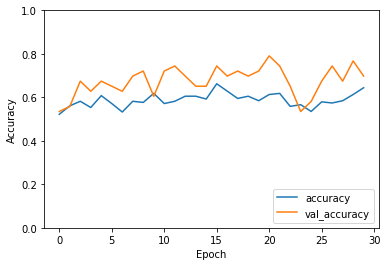

In [25]:
# Plot the change in accuracy and validation accruacy as a function of epochs

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')

In [26]:
performance = model.evaluate(X_test, y_test, verbose=1)



4/4 [==============================] - 2s 398ms/step - loss: 0.6507 - accuracy: 0.6852


In [27]:
y_pred = model.predict(X_test)
print(y_pred)

[[0.5929948  0.40700513]
 [0.6597779  0.34022212]
 [0.57606286 0.42393714]
 [0.5913837  0.4086163 ]
 [0.553503   0.44649705]
 [0.49543056 0.5045695 ]
 [0.49957883 0.5004211 ]
 [0.6246707  0.37532932]
 [0.4690349  0.5309651 ]
 [0.46113178 0.5388681 ]
 [0.49910912 0.5008909 ]
 [0.4594496  0.5405504 ]
 [0.4688229  0.53117704]
 [0.45187786 0.5481221 ]
 [0.445713   0.55428696]
 [0.47456256 0.5254374 ]
 [0.4253461  0.5746539 ]
 [0.5272031  0.4727969 ]
 [0.60129255 0.39870742]
 [0.5988051  0.4011949 ]
 [0.5277994  0.47220054]
 [0.46780732 0.53219265]
 [0.47399634 0.5260036 ]
 [0.30731502 0.692685  ]
 [0.4383596  0.56164044]
 [0.56076956 0.43923044]
 [0.44424438 0.5557557 ]
 [0.47519374 0.52480626]
 [0.5729593  0.42704073]
 [0.9918888  0.00811119]
 [0.52917737 0.47082263]
 [0.57999057 0.42000946]
 [0.9871895  0.01281048]
 [0.4417493  0.55825067]
 [0.45620668 0.54379326]
 [0.4887199  0.51128006]
 [0.6724827  0.32751727]
 [0.5262509  0.47374904]
 [0.46132404 0.5386759 ]
 [0.5673409  0.4326591 ]
